In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
# read in data
embedding_genotype = pd.read_csv("/scratch/users/omer_ronen/mutemb_esm/X_k_5_ilvm_esm_prod_pppl_full_ptv.csv")
phenotype = pd.read_csv("/scratch/users/omer_ronen/mutemb_esm/y_ilvm_oh.csv")
# save column names
colnames = embedding_genotype.columns
# make genotype a numpy array
embedding_genotype = embedding_genotype.to_numpy()
# make phenotype a 1D numpy array
phenotype = phenotype.to_numpy().reshape(-1)

In [33]:
# obtain same train-test split as the experiment, so that gender/age are aligned
embedding_genotype_train, embedding_genotype_test, phenotype_train, phenotype_test = \
        train_test_split(embedding_genotype, phenotype, test_size = 0.3,
                         random_state = 1)

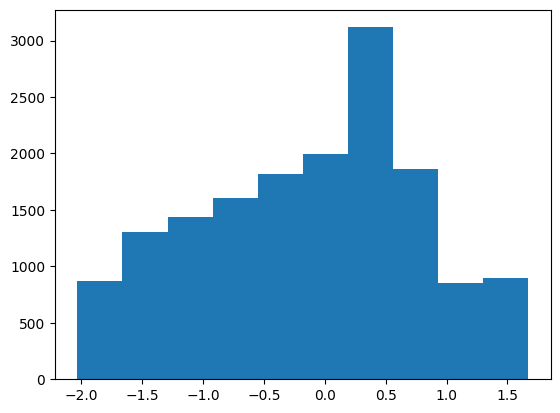

In [34]:
# plot histogram of genotype column -11
plt.hist(embedding_genotype_train[:, -11], bins = 10)
plt.show()

In [35]:
# read in results
lmdi_importances = pd.read_csv('lmdi_plus_importance_scores_subset_embedding_data.csv',
                               header=None)
mdi_importances = pd.read_csv('mdi_importance_scores_subset_embedding_data.csv', header = None)
mdi_importances = mdi_importances.to_numpy().reshape(-1)
mdi_importances

array([1.99648074e-04, 0.00000000e+00, 1.14263550e-04, ...,
       4.84040126e-04, 1.48835961e-05, 0.00000000e+00])

In [36]:
# subset the genotype data to only include the top 1000 features
top_1000_features = np.argsort(mdi_importances)[::-1][:1000]
top_1000_colnames = colnames[top_1000_features]
embedding_genotype_train_subset = embedding_genotype_train[:, top_1000_features]
embedding_genotype_test_subset = embedding_genotype_test[:, top_1000_features]
embedding_genotype_train_subset = pd.DataFrame(embedding_genotype_train_subset,
                                               columns = top_1000_colnames)
embedding_genotype_test_subset = pd.DataFrame(embedding_genotype_test_subset,
                                              columns=top_1000_colnames)
lmdi_importances.columns = top_1000_colnames

In [37]:
# Extract the feature name (part before the first underscore)
feature_names = lmdi_importances.columns.str.split('_').str[0]

# Group by feature name and sum the columns
lmdi_importances = np.abs(lmdi_importances).groupby(feature_names, axis=1).max()

# get new column names
new_colnames = lmdi_importances.columns

/tmp/ipykernel_517434/925260568.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  lmdi_importances = np.abs(lmdi_importances).groupby(feature_names, axis=1).max()


In [38]:
# get importances for men and women
lmdi_importances_men = lmdi_importances[embedding_genotype_train[:,-12]==1]
lmdi_importances_women = lmdi_importances[embedding_genotype_train[:,-12]==0]

In [39]:
# get importances for "old" and "young" (above/below 0 on standardardized age)
lmdi_importances_old = lmdi_importances[embedding_genotype_train[:,-11] > 0]
lmdi_importances_young = lmdi_importances[embedding_genotype_train[:,-11] <= 0]

In [40]:
# get importances for gender and age
lmdi_importances_old_men = lmdi_importances[(embedding_genotype_train[:,-12]==1) & (embedding_genotype_train[:,-11] > 0)]
lmdi_importances_old_women = lmdi_importances[(embedding_genotype_train[:,-12]==0) & (embedding_genotype_train[:,-11] > 0)]
lmdi_importances_young_men = lmdi_importances[(embedding_genotype_train[:,-12]==1) & (embedding_genotype_train[:,-11] <= 0)]
lmdi_importances_young_women = lmdi_importances[(embedding_genotype_train[:,-12]==0) & (embedding_genotype_train[:,-11] <= 0)]

In [41]:
# get rankings
lmdi_rankings = lmdi_importances.shape[1]-np.argsort(np.abs(lmdi_importances), axis = 1)

# rankings for gender
lmdi_rankings_men = lmdi_importances_men.shape[1]-np.argsort(np.abs(lmdi_importances_men), axis = 1)
lmdi_rankings_women = lmdi_importances_women.shape[1]-np.argsort(np.abs(lmdi_importances_women), axis = 1)

# rankings for age
lmdi_rankings_old = lmdi_importances_old.shape[1]-np.argsort(np.abs(lmdi_importances_old), axis = 1)
lmdi_rankings_young = lmdi_importances_young.shape[1]-np.argsort(np.abs(lmdi_importances_young), axis = 1)

# rankings for age & gender
lmdi_rankings_old_men = lmdi_importances_old_men.shape[1]-np.argsort(np.abs(lmdi_importances_old_men), axis = 1)
lmdi_rankings_old_women = lmdi_importances_old_women.shape[1]-np.argsort(np.abs(lmdi_importances_old_women), axis = 1)
lmdi_rankings_young_men = lmdi_importances_young_men.shape[1]-np.argsort(np.abs(lmdi_importances_young_men), axis = 1)
lmdi_rankings_young_women = lmdi_importances_young_women.shape[1]-np.argsort(np.abs(lmdi_importances_young_women), axis = 1)

# make them dataframes with the same column names
lmdi_rankings = pd.DataFrame(lmdi_rankings, columns = new_colnames)
lmdi_rankings_men = pd.DataFrame(lmdi_rankings_men, columns = new_colnames)
lmdi_rankings_women = pd.DataFrame(lmdi_rankings_women, columns = new_colnames)
lmdi_rankings_old = pd.DataFrame(lmdi_rankings_old, columns = new_colnames)
lmdi_rankings_young = pd.DataFrame(lmdi_rankings_young, columns = new_colnames)
lmdi_rankings_old_men = pd.DataFrame(lmdi_rankings_old_men, columns = new_colnames)
lmdi_rankings_old_women = pd.DataFrame(lmdi_rankings_old_women, columns = new_colnames)
lmdi_rankings_young_men = pd.DataFrame(lmdi_rankings_young_men, columns = new_colnames)
lmdi_rankings_young_women = pd.DataFrame(lmdi_rankings_young_women, columns = new_colnames)

In [42]:
# get the most important genes
print("Most Important Genes (Overall): Average LMDI+ Score")
print(np.abs(lmdi_importances).mean(axis=0).sort_values(ascending=False))
top_genes_overall = np.abs(lmdi_importances).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Overall): Average LMDI+ Score
0                  0.955753
1                  0.015032
ENSG00000155657    0.004813
4                  0.003532
3                  0.002636
5                  0.000115
ENSG00000185294    0.000102
9                  0.000058
6                  0.000036
7                  0.000011
10                 0.000007
ENSG00000136319    0.000003
dtype: float64


In [43]:
# get the most important genes
print("Most Important Genes (Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_men).mean(axis=0).sort_values(ascending=False))
top_genes_men = np.abs(lmdi_importances_men).mean(axis=0).sort_values(ascending=False).index
print("Most Important Genes (Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_women).mean(axis=0).sort_values(ascending=False))
top_genes_women = np.abs(lmdi_importances_women).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Men): Average LMDI+ Score
0                  0.934312
1                  0.031034
4                  0.005957
ENSG00000155657    0.005181
3                  0.004467
5                  0.000116
9                  0.000090
6                  0.000070
ENSG00000185294    0.000014
7                  0.000007
10                 0.000005
ENSG00000136319    0.000003
dtype: float64
Most Important Genes (Women): Average LMDI+ Score
0                  0.975004
ENSG00000155657    0.004482
4                  0.001354
3                  0.000992
1                  0.000665
ENSG00000185294    0.000180
5                  0.000114
9                  0.000029
7                  0.000014
10                 0.000009
6                  0.000005
ENSG00000136319    0.000002
dtype: float64


In [44]:
# get the most important genes
print("Most Important Genes (Old): Average LMDI+ Score")
print(np.abs(lmdi_importances_old).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young): Average LMDI+ Score")
print(np.abs(lmdi_importances_young).mean(axis=0).sort_values(ascending=False))
top_genes_old = np.abs(lmdi_importances_old).mean(axis=0).sort_values(ascending=False).index
top_genes_young = np.abs(lmdi_importances_young).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Old): Average LMDI+ Score
0                  0.962496
1                  0.013763
ENSG00000155657    0.004509
4                  0.002401
3                  0.001739
5                  0.000120
ENSG00000185294    0.000076
6                  0.000058
9                  0.000036
10                 0.000007
7                  0.000004
ENSG00000136319    0.000002
dtype: float64
Most Important Genes (Young): Average LMDI+ Score
0                  0.949814
1                  0.016150
ENSG00000155657    0.005080
4                  0.004527
3                  0.003426
ENSG00000185294    0.000124
5                  0.000110
9                  0.000078
7                  0.000017
6                  0.000017
10                 0.000006
ENSG00000136319    0.000003
dtype: float64


In [45]:
# get the most important genes
print("Most Important Genes (Old Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_old_men).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Old Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_old_women).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_young_men).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_young_women).mean(axis=0).sort_values(ascending=False))
top_genes_old_men = np.abs(lmdi_importances_old_men).mean(axis=0).sort_values(ascending=False).index
top_genes_old_women = np.abs(lmdi_importances_old_women).mean(axis=0).sort_values(ascending=False).index
top_genes_young_men = np.abs(lmdi_importances_young_men).mean(axis=0).sort_values(ascending=False).index
top_genes_young_women = np.abs(lmdi_importances_young_women).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Old Men): Average LMDI+ Score
0                  0.949527
1                  0.025887
ENSG00000155657    0.004783
4                  0.003643
3                  0.002769
5                  0.000124
6                  0.000107
9                  0.000045
ENSG00000185294    0.000008
10                 0.000005
ENSG00000136319    0.000004
7                  0.000001
dtype: float64
Most Important Genes (Old Women): Average LMDI+ Score
0                  9.765353e-01
ENSG00000155657    4.212876e-03
4                  1.055802e-03
1                  6.382022e-04
3                  6.236623e-04
ENSG00000185294    1.504904e-04
5                  1.157747e-04
9                  2.526012e-05
10                 9.122975e-06
7                  6.016167e-06
6                  4.670115e-06
ENSG00000136319    1.985748e-07
dtype: float64
Most Important Genes (Young Men): Average LMDI+ Score
0                  0.918186
1                  0.036488
4                  0.008410
3     

In [46]:
# check the rankings overlap for top genes
overlap_gender = np.intersect1d(top_genes_men, top_genes_women)
overlap_age = np.intersect1d(top_genes_old, top_genes_young)
overlap_age_gender = np.intersect1d(np.intersect1d(top_genes_old_men,
                                                   top_genes_old_women),
                                    np.intersect1d(top_genes_young_men,
                                                   top_genes_young_women))
print(f"There is a {overlap_gender.shape[0]/10.0*100:.2f}% " +
      "Overlap of Top Genes (Men and Women). " +
      f"The intersection is \n{overlap_gender}.")
print(f"There is a {overlap_age.shape[0]/10.0*100:.2f}% " + 
      "Overlap of Top Genes (Old and Young). " +
      f"The intersection is \n{overlap_age}.")
print(f"There is a {overlap_age_gender.shape[0]/10.0*100:.2f}% " +
      "Overlap of Top Genes (Age x Gender). " +
      f"The intersection is \n{overlap_age_gender}.")

There is a 120.00% Overlap of Top Genes (Men and Women). The intersection is 
['0' '1' '10' '3' '4' '5' '6' '7' '9' 'ENSG00000136319' 'ENSG00000155657'
 'ENSG00000185294'].
There is a 120.00% Overlap of Top Genes (Old and Young). The intersection is 
['0' '1' '10' '3' '4' '5' '6' '7' '9' 'ENSG00000136319' 'ENSG00000155657'
 'ENSG00000185294'].
There is a 120.00% Overlap of Top Genes (Age x Gender). The intersection is 
['0' '1' '10' '3' '4' '5' '6' '7' '9' 'ENSG00000136319' 'ENSG00000155657'
 'ENSG00000185294'].


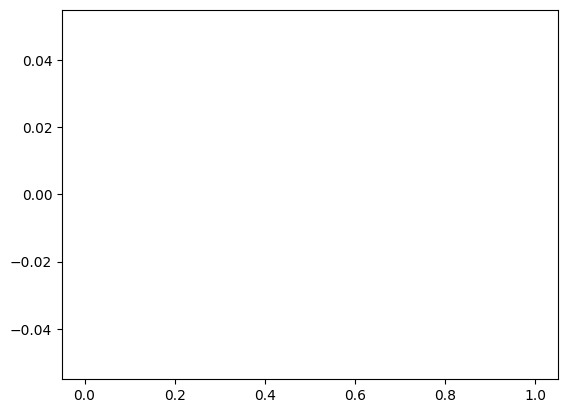

In [47]:
# plot histogram of total average importance scores for genes
plt.hist(np.abs(lmdi_importances.iloc[:,:-12]).mean(axis=0), bins = 50)
plt.show()